In [69]:
#https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction 

In [1]:
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4489,4490,15787035,Anderson,602,France,Female,35,8,0.00,2,1,1,152843.53,0
882,883,15785519,May,565,France,Male,36,6,106192.10,1,1,0,149575.59,0
6725,6726,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0
4536,4537,15756333,Khan,642,France,Female,55,7,0.00,2,1,1,101515.76,0
5763,5764,15700965,Toscano,724,France,Female,32,6,0.00,2,1,1,150026.79,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)

In [9]:
print(df['Geography'].value_counts(),
      df['Gender'].value_counts(),
      df['Exited'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 Gender
Male      5457
Female    4543
Name: count, dtype: int64 Exited
0    7963
1    2037
Name: count, dtype: int64


In [11]:
#if geography_germany and geography_spain both are false that indicates geography = france

df = pd.get_dummies(df, columns=(['Geography','Gender']), drop_first = True)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


In [13]:
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


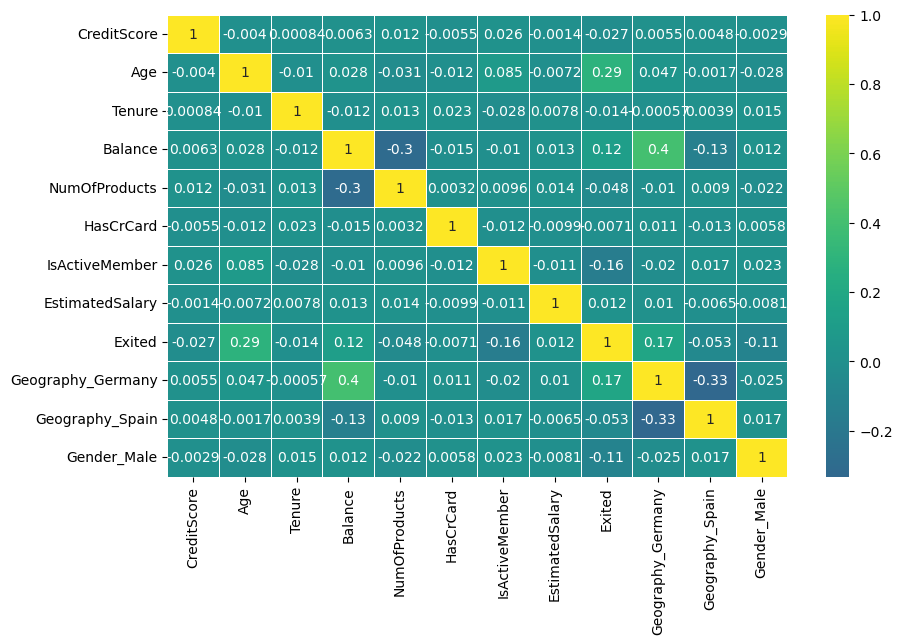

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', center = 0, linewidth = 0.5)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_dim = 11))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\mehed\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [49]:
history = model.fit(X_train_scaled,y_train, 
          batch_size = 50, 
          epochs =100, 
          verbose = 1, 
          validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8639 - loss: 0.3293 - val_accuracy: 0.8744 - val_loss: 0.2933
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8681 - loss: 0.3213 - val_accuracy: 0.8744 - val_loss: 0.2994
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3155 - val_accuracy: 0.8800 - val_loss: 0.2979
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3176 - val_accuracy: 0.8756 - val_loss: 0.3000
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3139 - val_accuracy: 0.8769 - val_loss: 0.3013
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8669 - loss: 0.3180 - val_accuracy: 0.8763 - val_loss: 0.3014
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3156 - val_accuracy: 0.8775 - val_loss: 0.3035
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3157 - val_accu

In [53]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
import numpy as np

y_pred = np.where(y_log > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score (y_test,y_pred)

0.864

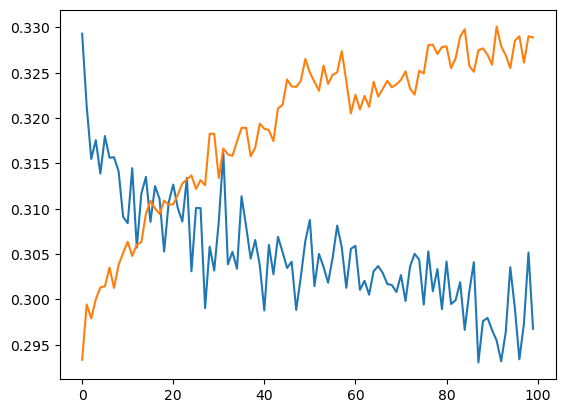

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

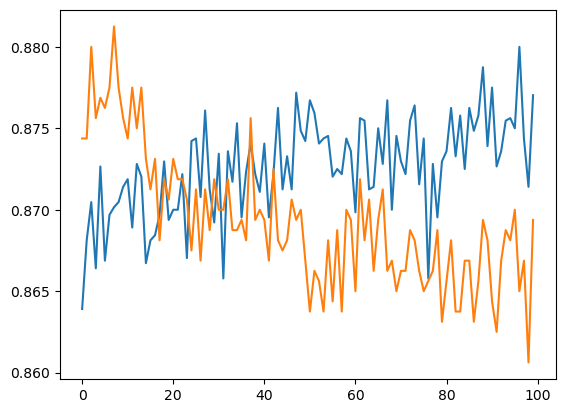

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#clear overfitting from 30th epoch
#this is just a basic example of how neural networks work before we jump into backpropagation